<a href="https://colab.research.google.com/github/mjkanf1994/ml_edu/blob/master/sephora_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

세포라 웹 사이트
https://www.kaggle.com/raghadalharbi/all-products-available-on-sephora-website/notebooks

In [1]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd drive/'My Drive'/'Colab Notebooks/ml_project'

/content/drive/My Drive/Colab Notebooks/ml_project


In [3]:
%pwd

'/content/drive/My Drive/Colab Notebooks/ml_project'

In [4]:
%ls

gender_submission.csv  sephora_website_dataset.csv  test.csv   weather2.csv
netflix_titles.csv     submission.csv               train.csv  weather.csv


In [5]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
# import sample_submission file
sep= pd.read_csv('sephora_website_dataset.csv')

In [7]:
display(sep)

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,URL,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,https://www.sephora.com/product/blu-mediterran...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,https://www.sephora.com/product/colonia-P16360...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,https://www.sephora.com/product/blu-mediterran...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,https://www.sephora.com/product/blu-mediterran...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,https://www.sephora.com/product/colonia-miniat...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9163,2208502,SEPHORA COLLECTION,Face Masks,The Rose Gold Mask,no size,2.0,15,6200,6.0,6.0,https://www.sephora.com/product/the-rose-gold-...,True,limited edition · exclusive,no options,What it is: A limited-edition- nurturing and h...,Suggested Usage:-Unfold the mask.-Apply the ma...,-Rose Quartz Extract: Hydrates dry skin. Aqua...,0,1,1,0
9164,2298909,SEPHORA COLLECTION,Lip Sets,Give Me Some Sugar Colorful Gloss Balm Set,3 x 0.32 oz/ 9 g,0.0,0,266,15.0,27.0,https://www.sephora.com/product/sephora-collec...,True,exclusive,no options,What it is: A set of three bestselling Colorfu...,Suggested Usage:-Apply directly to lips using ...,Colorful Gloss Balm Wanderlust: Hydrogenated P...,0,1,0,0
9165,2236750,SEPHORA COLLECTION,Tinted Moisturizer,Weekend Warrior Tone Up Cream,0.946 oz/ 28 mL,0.0,0,445,16.0,16.0,https://www.sephora.com/product/sephora-collec...,True,exclusive,no options,What it is: A weightless complexion booster- i...,Suggested Usage:-Use this product as the last ...,Aqua (Water)- Dimethicone- Isohexadecane- Poly...,0,1,0,0
9166,50,SEPHORA COLLECTION,no category,Gift Card,no size,5.0,46,0,50.0,50.0,https://www.sephora.com/product/gift-card-P370...,False,0,no options,What it is:- Available in denominations of $10...,no instructions,unknown,0,0,0,0


In [8]:
sep.describe()

,id,rating,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer
count,9.168000e+03,9168.000000,9168.000000,9.168000e+03,9168.000000,9168.00000,9168.000000,9168.000000,9168.000000,9168.000000
mean,1.962952e+06,3.990020,282.139180,1.627859e+04,50.063237,51.82359,0.234839,0.264725,0.091841,0.000327
std,3.859714e+05,1.007707,890.642028,4.260651e+04,47.164989,49.45902,0.423921,0.441211,0.288817,0.018087
min,5.000000e+01,0.000000,0.000000,0.000000e+00,2.000000,2.00000,0.000000,0.000000,0.000000,0.000000
25%,1.819453e+06,4.000000,10.000000,1.600000e+03,24.000000,25.00000,0.000000,0.000000,0.000000,0.000000
50%,2.072354e+06,4.000000,46.000000,4.800000e+03,35.000000,35.00000,0.000000,0.000000,0.000000,0.000000
75%,2.230591e+06,4.500000,210.000000,1.380000e+04,59.000000,60.00000,0.000000,1.000000,0.000000,0.000000
max,2.359685e+06,5.000000,19000.000000,1.300000e+06,549.000000,549.00000,1.000000,1.000000,1.000000,1.000000


In [9]:
sep.describe(include=np.object)

,brand,category,name,size,URL,MarketingFlags_content,options,details,how_to_use,ingredients
count,9168,9168,9168,9168,9168,9168,9168,9168,9168,9168
unique,324,143,9106,1623,9168,10,564,8839,6497,6962
top,SEPHORA COLLECTION,Perfume,Blush,no size,https://www.sephora.com/product/refreshing-cle...,0,no options,no details,no instructions,unknown
freq,496,665,4,3161,1,4786,8377,14,1573,1630


# 브랜드에 따른 분석

## 브랜드 전체에 대한 barplot 
- 너무 많은 브랜드가 있어서 한눈에 들어오지 않는 문제점을 발견

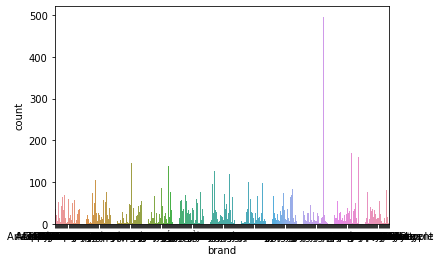

In [10]:
%matplotlib inline
sns.countplot(x='brand', data = sep)
plt.show()

## brand중 top 5에 대해서만 추출

In [54]:
s=sep.groupby('brand').size()

In [55]:
s.nlargest(5)

brand
SEPHORA COLLECTION    496
CLINIQUE              234
tarte                 170
TOM FORD              161
Dior                  145
dtype: int64

### top5 추출

In [56]:
brand_col = ["SEPHORA COLLECTION","CLINIQUE","tarte","TOM FORD","Dior"]
sep.brand.isin(brand_col)

sep_brand2= sep[sep.brand.isin(brand_col)]
sep_brand2.shape

(1206, 21)

In [57]:
sep_brand2

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,URL,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
1665,2019461,CLINIQUE,Moisturizers,Moisture Surge 72-Hour Auto-Replenishing Hydrator,no size,4.5,1000,71100,39.5,39.5,https://www.sephora.com/product/moisture-surge...,False,0,no options,What it is: A refreshing- oil-free gel cream ...,Suggested Usage:-This multitasking formula can...,-Auto-Replenishing Technology with Caffeine: ...,0,0,0,0
1666,1538354,CLINIQUE,Moisturizers,Dramatically Different Moisturizing Lotion+,no size,4.0,1000,72900,28.0,28.0,https://www.sephora.com/product/dramatically-d...,False,0,no options,What it is: A dermatologist-developed face mo...,Suggested Usage:-Spread all over face and thro...,-Sunflower Seed Cake- Barley Extract- and Cucu...,0,0,0,0
1667,789727,CLINIQUE,Moisturizers,Dramatically Different Moisturizing Gel,no size,4.5,3000,83000,28.0,28.0,https://www.sephora.com/product/dramatically-d...,False,0,no options,What it is: A dermatologist-developed- oil-fr...,Suggested Usage:-Spread all over face and thro...,-Sunflower Seed Cake- Barley Extract- and Cuc...,0,0,0,0
1668,899070,CLINIQUE,Face Wash & Cleansers,Liquid Facial Soap,no size,4.5,2000,46500,18.5,18.5,https://www.sephora.com/product/liquid-facial-...,False,0,no options,Which skin type is it good for?✔ Normal✔ Oily✔...,Suggested Usage:-With tepid water- lather Liqu...,Water- Sodium Laureth Sulfate- Sodium Chloride...,0,0,0,0
1669,2084010,CLINIQUE,Foundation,Even Better Foundation Makeup Broad Spectrum S...,no size,4.0,2000,67300,29.5,29.5,https://www.sephora.com/product/even-better-ma...,False,0,no options,What it is: A dermatologist-developed foundati...,Suggested Usage:-Start in center of your face-...,-Octinoxate 5.9%- Titanium Dioxide 3.5%- Zinc ...,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9163,2208502,SEPHORA COLLECTION,Face Masks,The Rose Gold Mask,no size,2.0,15,6200,6.0,6.0,https://www.sephora.com/product/the-rose-gold-...,True,limited edition · exclusive,no options,What it is: A limited-edition- nurturing and h...,Suggested Usage:-Unfold the mask.-Apply the ma...,-Rose Quartz Extract: Hydrates dry skin. Aqua...,0,1,1,0
9164,2298909,SEPHORA COLLECTION,Lip Sets,Give Me Some Sugar Colorful Gloss Balm Set,3 x 0.32 oz/ 9 g,0.0,0,266,15.0,27.0,https://www.sephora.com/product/sephora-collec...,True,exclusive,no options,What it is: A set of three bestselling Colorfu...,Suggested Usage:-Apply directly to lips using ...,Colorful Gloss Balm Wanderlust: Hydrogenated P...,0,1,0,0
9165,2236750,SEPHORA COLLECTION,Tinted Moisturizer,Weekend Warrior Tone Up Cream,0.946 oz/ 28 mL,0.0,0,445,16.0,16.0,https://www.sephora.com/product/sephora-collec...,True,exclusive,no options,What it is: A weightless complexion booster- i...,Suggested Usage:-Use this product as the last ...,Aqua (Water)- Dimethicone- Isohexadecane- Poly...,0,1,0,0
9166,50,SEPHORA COLLECTION,no category,Gift Card,no size,5.0,46,0,50.0,50.0,https://www.sephora.com/product/gift-card-P370...,False,0,no options,What it is:- Available in denominations of $10...,no instructions,unknown,0,0,0,0


### brand top 5에* 대한 bar plot

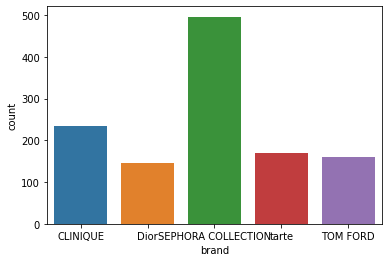

In [58]:
%matplotlib inline
sns.countplot(x='brand', data = sep_brand2)
plt.show()

## top 5브랜드 별 category top 5

In [44]:
b=sep_brand2.groupby('category').size()

In [59]:
b.nlargest(5)

category
Moisturizers         98
Perfume              92
Face Brushes         72
Mascara              64
Value & Gift Sets    64
dtype: int64

In [60]:
category_col = ["Moisturizers","Perfume","Face Brushes","Mascara ","Value & Gift Sets"]
sep_brand2.category.isin(category_col)

sep_category= sep_brand2[sep_brand2.category.isin(category_col)]
sep_category.shape

(216, 21)

### top10브랜드와 top 5 category 사이의 관계 

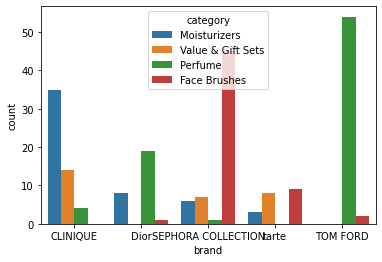

In [67]:
sns.countplot(x = "brand", data=sep_category, hue = "category")
plt.show()

#### top10브랜드와 top 5 category 사이의 관계에서 온라인 판매 조사

In [63]:
sep_category.groupby('online_only').size()

online_only
0    193
1     23
dtype: int64

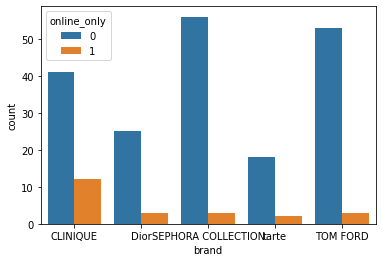

In [76]:
sns.countplot(x = "brand", data=sep_category, hue = "online_only")
plt.show()

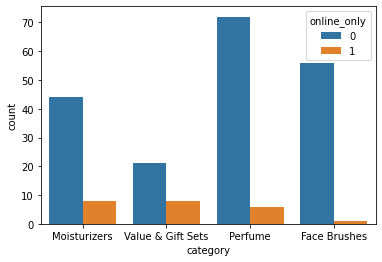

In [77]:
sns.countplot(x = "category", data=sep_category, hue = "online_only")
plt.show()